In [2]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\whitt\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


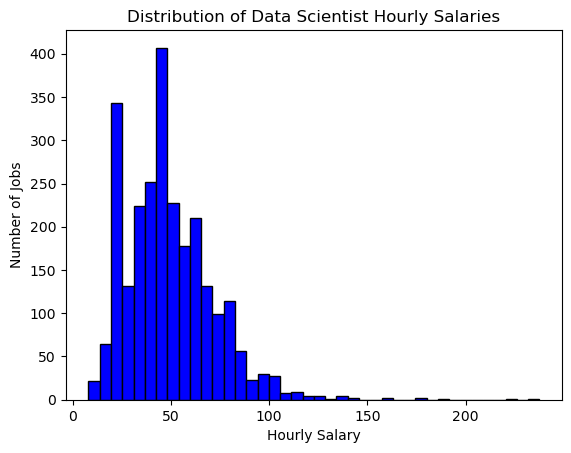

In [8]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['salary_hour_avg'].notna())].copy()

df_DS.plot(kind='hist', y='salary_hour_avg', bins=40, edgecolor='black', color='blue')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.legend().remove()
plt.show()

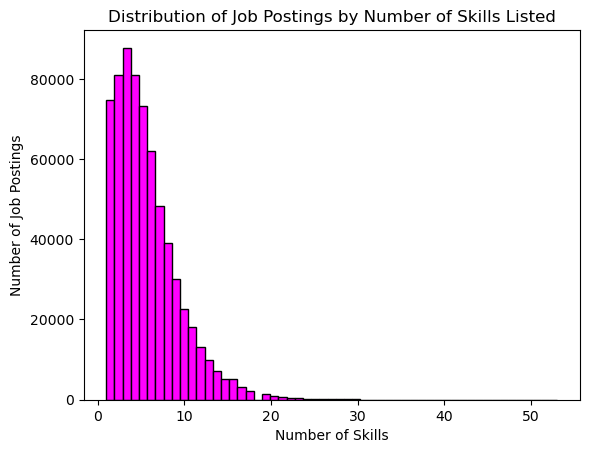

In [13]:
df_skills = df.dropna(subset=['job_skills']).copy()

df_skills['num_skills'] = df_skills['job_skills'].apply(len)

df_skills['num_skills'].plot(kind='hist', y='num_skills', bins=55, color='magenta', edgecolor='black')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.legend().remove()
plt.show()

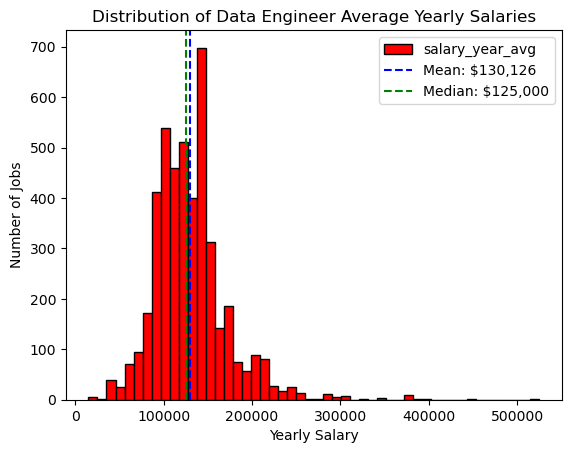

In [21]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')

plt.axvline(x=df_DE['salary_year_avg'].mean(), color='blue', linestyle='dashed', label=f'Mean: ${df_DE["salary_year_avg"].mean():,.0f}')
plt.axvline(x=df_DE['salary_year_avg'].median(), color='green', linestyle='dashed', label=f'Median: ${df_DE["salary_year_avg"].median():,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Average Yearly Salaries')
plt.legend()
plt.show()

